In [1]:
#importing liblaries
import numpy as np
from mnist import MNIST
import random
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix
import pandas as pd

In [2]:
#creating MNIST instance
mndata = MNIST()

In [3]:
#getting train images and labels
train_images,train_labels = mndata.load_training()

In [4]:
#getting test images and labels
test_images,test_labels = mndata.load_testing()

In [5]:
#transforming to array
train_labels = np.array(train_labels)

In [6]:
#transforming to array
test_labels = np.array(test_labels)

In [7]:
type(train_images)

list

In [8]:
#creating a dictinoary to show the label names
label_name = {
    0:"T-shirt/map",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle bot"
}

In [9]:
#scalling the training image
scaled_train_image = np.array(train_images,dtype = "uint8") / 255.0

In [10]:
#scalling the test image
scaled_test_image =  np.array(test_images,dtype = "uint8") / 255.0

In [11]:
#displaying scaled train image
scaled_train_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
#displaying scaled test image
scaled_test_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# creating varaibles image width and height
img_w,img_h = 28,28

In [14]:
# testing to show different images and their labels
index = random.randrange(0,len(scaled_train_image))
image_array = scaled_train_image[index]
image_array = image_array.reshape(img_h,img_w)
#img = outputimg = Image.fromarray(image_array)
print(image_array.shape)

(28, 28)


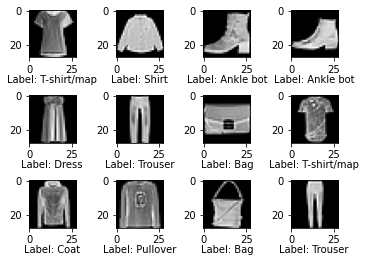

In [15]:
#displaying different train images and labels
for i in range(1,13):
    plt.subplot(3,4,i)
    index = random.randrange(0,len(train_images))
    image_array = np.array(train_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    #img = outputimg = Image.fromarray(image_array)
    plt.xlabel("Label: " + label_name[train_labels[index]],labelpad=0.2)
    plt.subplots_adjust(hspace=.8)
    plt.imshow(image_array, cmap='gray')

In [16]:
type(train_labels)

numpy.ndarray

In [17]:
#showing unique labels in train labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
# cv.imshow('Test Image', image_array)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [19]:
# cv.imwrite('test.png',image_array)

In [20]:
# transforming the train image in assignment description format B x N
new_train_image = scaled_train_image.reshape(len(scaled_train_image),img_w*img_h)

In [21]:
# testing the new array shape
new_train_image.shape

(60000, 784)

In [22]:
# transforming the test image in assignment description format B x N
new_test_image = scaled_test_image.reshape(len(scaled_test_image),img_w*img_h)

In [23]:
# testing the new array shape
new_test_image.shape

(10000, 784)

# <i>K-Neighbors</i>

In [24]:
# importing knn
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#creating instance 
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [26]:
#fitting the model
%%time
knn.fit(new_train_image,train_labels)

Wall time: 36.5 s


KNeighborsClassifier()

In [27]:
#predicting new labels
%%time
knn_predict_org = knn.predict(new_test_image)

Wall time: 12min 28s


In [28]:
# testing whether prediction is correct or not
np.unique(knn_predict_org)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
# testing the orginal labels 
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [30]:
#displaying accuracy score
print("Accuracy Score:",accuracy_score(test_labels,knn_predict_org))

Accuracy Score: 0.8554


In [31]:
#displaying misclassified samples
print("Misclassified Samples:", (test_labels != knn_predict_org).sum())

Misclassified Samples: 1446


In [32]:
#displaying confusion matrix as an array form
%%time
confusion_matrix(test_labels,knn_predict_org)

Wall time: 14 ms


array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]], dtype=int64)

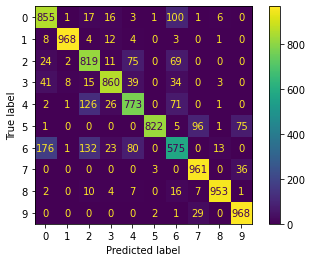

Wall time: 11min 59s


In [33]:
#using matplot liblary to display confusion matrix 
%%time
plot_confusion_matrix(knn,new_test_image,test_labels)
plt.show()

In [34]:
#creating a function to display 3 image in one row
def showImage3():
    plt.subplot(1,3,1)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=0.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,2)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.9,wspace=0.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,3)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.show()

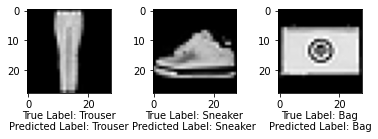

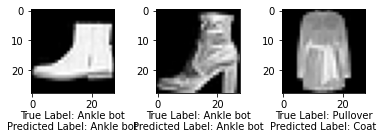

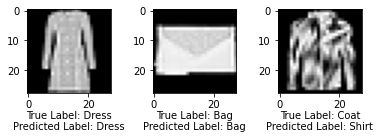

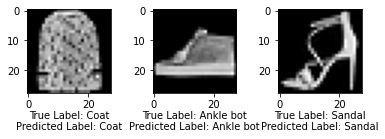

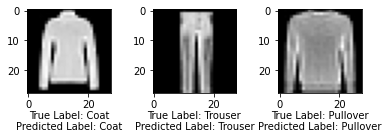

In [35]:
#creating a for loop to display multiple image
i=0
while(i<5):
    showImage3()
    i+=1

# <i>Perceptron</i> 

In [36]:
#importing perceptron model
from sklearn.linear_model import Perceptron

In [37]:
#creating perceptron instance
perceptron = Perceptron(max_iter=500, eta0=0.01,random_state=0)

In [38]:
#fitting the model
perceptron.fit(new_train_image,train_labels)

Perceptron(eta0=0.01, max_iter=500)

In [39]:
#predicting the new labels
%%time
percepton_prediction_org = perceptron.predict(new_test_image)

Wall time: 44.3 ms


In [40]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,percepton_prediction_org))

Accuracy Score: 0.8142


In [41]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != percepton_prediction_org).sum())

Misclassified Samples: 1858


In [42]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,percepton_prediction_org)

Wall time: 12 ms


array([[711,   3,   9,  80,   2,   8, 170,   2,  15,   0],
       [  5, 948,   0,  31,   5,   0,   7,   1,   2,   1],
       [ 34,   6, 459,  22, 203,   1, 262,   1,  12,   0],
       [ 18,  10,   0, 886,  18,   1,  64,   0,   3,   0],
       [  3,   2,  32,  58, 740,   2, 153,   0,  10,   0],
       [  1,   0,   0,   1,   0, 938,   0,  32,   4,  24],
       [ 92,   0,  52,  65,  82,   1, 672,   0,  36,   0],
       [  0,   0,   0,   0,   0,  57,   0, 888,   0,  55],
       [  6,   0,   5,  10,   4,  12,  18,   5, 940,   0],
       [  0,   0,   0,   1,   0,  15,   1,  23,   0, 960]], dtype=int64)

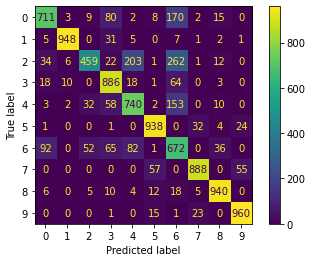

Wall time: 513 ms


In [43]:
#using matplot liblary to plot the confusion matrix
%%time
plot_confusion_matrix(perceptron,new_test_image,test_labels)
plt.show()

In [44]:
# creating a function to show 3 images in a single row
def showImage3():
    plt.subplot(1,3,1)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,2)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.9,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,3)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.show()

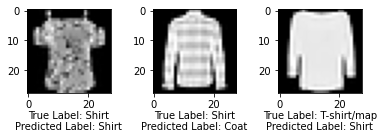

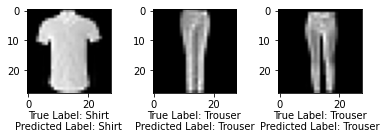

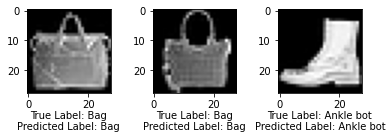

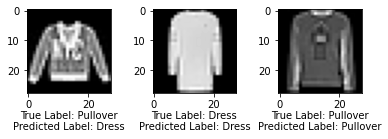

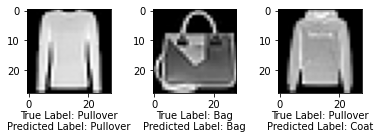

In [45]:
#creating a loop to show multiple images
i=0
while(i<5):
    showImage3()
    i+=1

# <i>SVM</i>

In [46]:
#importing the model
from sklearn.svm import SVC

In [47]:
#creating an instance
svm = SVC(kernel = 'rbf',C=100,random_state=0)

In [48]:
#fitting the model
%%time
svm.fit(new_train_image,train_labels)

Wall time: 8min 21s


SVC(C=100, random_state=0)

In [49]:
#predicting a new label
%%time
svm_pred_org = svm.predict(new_test_image)

Wall time: 2min 58s


In [50]:
#displaying accuracy scores
print("Accuracy Score: ", accuracy_score(test_labels,svm_pred_org))

Accuracy Score:  0.8963


In [51]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != svm_pred_org).sum())

Misclassified Samples: 1037


In [52]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,svm_pred_org)

Wall time: 16 ms


array([[842,   1,  13,  20,   6,   1, 109,   0,   8,   0],
       [  2, 980,   2,  11,   3,   0,   2,   0,   0,   0],
       [ 24,   3, 836,   9,  69,   0,  57,   0,   2,   0],
       [ 27,   6,  12, 897,  32,   0,  20,   0,   6,   0],
       [  1,   1,  86,  31, 819,   0,  61,   0,   1,   0],
       [  0,   0,   0,   1,   0, 976,   0,  16,   0,   7],
       [121,   0,  83,  28,  56,   0, 705,   0,   7,   0],
       [  0,   0,   0,   0,   0,  14,   0, 962,   0,  24],
       [  2,   1,   3,   3,   1,   2,   2,   3, 983,   0],
       [  0,   0,   0,   0,   0,  11,   1,  25,   0, 963]], dtype=int64)

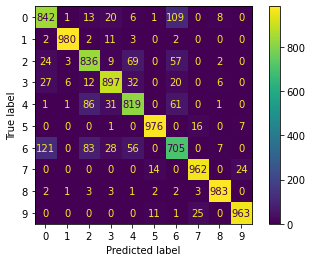

Wall time: 2min 58s


In [53]:
#using matplot liblary to display confusion matrix
%%time
plot_confusion_matrix(svm,new_test_image,test_labels)
plt.show()

In [54]:
# creating a function to display 3 image in a single row
def showImage3():
    plt.subplot(1,3,1)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,2)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.9,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,3)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.show()

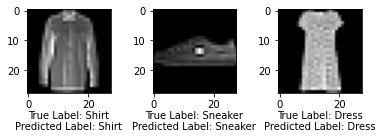

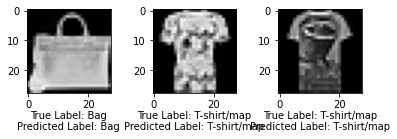

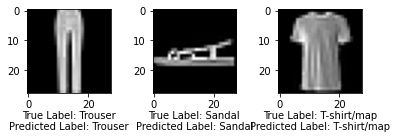

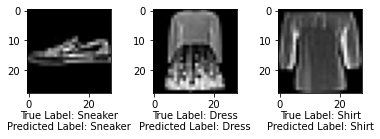

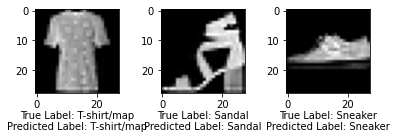

In [55]:
#creating a loop to display multiple images
i=0
while(i<5):
    showImage3()
    i+=1

# <i> Decision Trees </i>

In [56]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier

In [57]:
#instantiating the model
decision_tree = DecisionTreeClassifier(criterion="entropy")

In [58]:
#fitting the model
%%time
decision_tree.fit(new_train_image,train_labels)

Wall time: 34.4 s


DecisionTreeClassifier(criterion='entropy')

In [59]:
#predicting the new labels
tree_predict_org = decision_tree.predict(new_test_image)

In [60]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,tree_predict_org))

Accuracy Score: 0.8015


In [61]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != tree_predict_org).sum())

Misclassified Samples: 1985


In [62]:
#displaying the accuracy matrix in an array form
%%time
confusion_matrix(test_labels,tree_predict_org)

Wall time: 12 ms


array([[744,   3,  21,  41,  11,   4, 163,   0,  13,   0],
       [  8, 947,   4,  30,   5,   0,   4,   0,   2,   0],
       [ 22,   0, 683,  11, 143,   0, 129,   0,  11,   1],
       [ 40,  29,  20, 789,  60,   0,  53,   0,   8,   1],
       [ 11,   3, 156,  43, 676,   0, 106,   0,   5,   0],
       [  2,   1,   1,   2,   0, 897,   0,  62,   9,  26],
       [152,   9, 114,  36, 102,   1, 562,   0,  24,   0],
       [  0,   0,   0,   0,   0,  58,   0, 882,   6,  54],
       [  8,   3,   9,   6,   4,  13,  15,   8, 929,   5],
       [  0,   1,   0,   0,   1,  19,   0,  70,   3, 906]], dtype=int64)

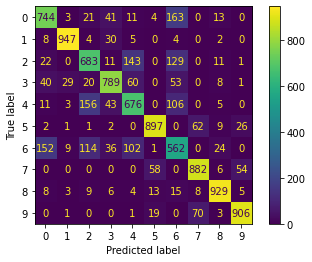

Wall time: 499 ms


In [63]:
#using matplot liblary to show confusion matrix
%%time
plot_confusion_matrix(decision_tree,new_test_image,test_labels)
plt.show()

In [64]:
#creating a function to display 3 image in  a single row
def showImage3():
    plt.subplot(1,3,1)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.9,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,2)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.9,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,3)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='uint8')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.show()

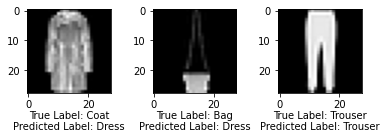

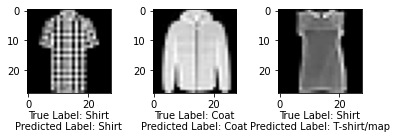

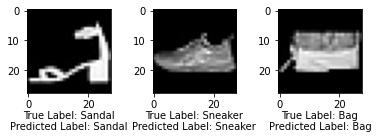

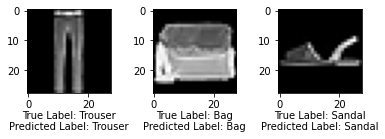

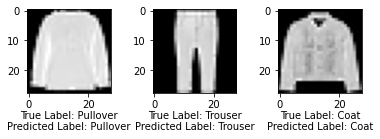

In [65]:
#creating a loop to display multiple images
i=0
while(i<5):
    showImage3()
    i+=1

# <i>Random Forests</i>

In [66]:
#importing the random forest model
from sklearn.ensemble import RandomForestClassifier

In [67]:
# creating an instance
random_forest = RandomForestClassifier(criterion="entropy",n_estimators = 100 , random_state = 0)

In [68]:
#fitting the model
%%time
random_forest.fit(new_train_image,train_labels)

Wall time: 1min 33s


RandomForestClassifier(criterion='entropy', random_state=0)

In [69]:
#predicting the new label
%%time
random_forest_pred_org = random_forest.predict(new_test_image)

Wall time: 389 ms


In [70]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,random_forest_pred_org))

Accuracy Score: 0.876


In [71]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != random_forest_pred_org).sum())

Misclassified Samples: 1240


In [72]:
#displaying the confusion matrix in an array form
%%time
confusion_matrix(test_labels,random_forest_pred_org)

Wall time: 9 ms


array([[863,   0,  14,  26,   4,   1,  78,   0,  14,   0],
       [  2, 965,   3,  22,   3,   0,   4,   0,   1,   0],
       [ 12,   0, 808,   9, 114,   0,  52,   0,   5,   0],
       [ 21,   2,  11, 907,  27,   0,  30,   0,   2,   0],
       [  0,   0, 101,  39, 810,   0,  48,   0,   2,   0],
       [  0,   0,   0,   0,   0, 953,   0,  35,   2,  10],
       [163,   1, 126,  29,  83,   0, 578,   0,  20,   0],
       [  0,   0,   0,   0,   0,  10,   0, 952,   0,  38],
       [  0,   2,   3,   2,   4,   2,   7,   5, 974,   1],
       [  0,   0,   0,   0,   0,   6,   1,  41,   2, 950]], dtype=int64)

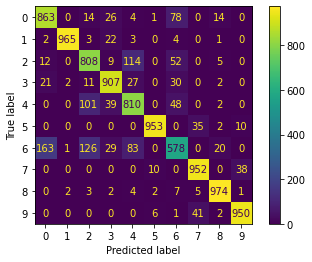

Wall time: 809 ms


In [73]:
#using matplot liblary to plot confusion matrix
%%time
plot_confusion_matrix(random_forest,new_test_image,test_labels)
plt.show()

In [74]:
#creating a function to display 3 image in  a single row
def showImage3():
    plt.subplot(1,3,1)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,2)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.9,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,3,3)
    index = random.randrange(0,len(test_images))
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
               "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.subplots_adjust(hspace=.5,wspace=.5)
    plt.imshow(image_array, cmap='gray')
    plt.show()

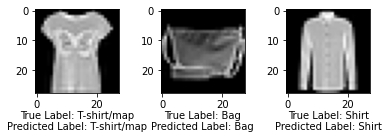

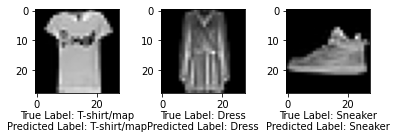

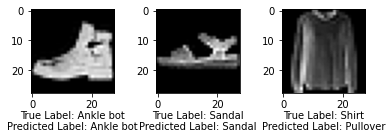

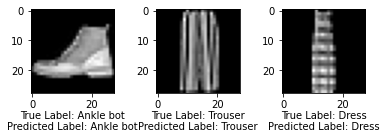

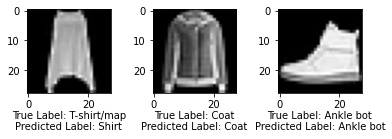

In [75]:
#creating a loop to display multiple images
i=0
while(i<5):
    showImage3()
    i+=1

# <i>PCA</i>

In [76]:
#importing the pca
from sklearn.decomposition import PCA

In [77]:
#recall the tran image array shape
new_train_image.shape

(60000, 784)

In [78]:
#recall the train image
new_train_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
#calculating explained variance ratio between n_components = 1 and 40
explainedVarianceRatios = []
for i in range(1,41):
    my_PCA = PCA(n_components=i)
    my_PCA.fit_transform(new_train_image)
    explainedVarianceRatios.append(my_PCA.explained_variance_ratio_.sum()*100)

In [80]:
#printing the results
for item in enumerate(explainedVarianceRatios,1):
    print(item)

(1, 29.0392279213657)
(2, 46.7945378995278)
(3, 52.81375988269661)
(4, 57.77118788639643)
(5, 61.61884303429146)
(6, 65.07961235228979)
(7, 67.42130287332408)
(8, 69.3267165000861)
(9, 70.6765599336491)
(10, 71.99082677557183)
(11, 72.98369124156808)
(12, 73.89695548093106)
(13, 74.66270177067635)
(14, 75.32242019511817)
(15, 75.93023080843086)
(16, 76.52000720137704)
(17, 77.07153232939037)
(18, 77.59645581124367)
(19, 78.05402634437709)
(20, 78.50974034070369)
(21, 78.9434997534777)
(22, 79.35040766045529)
(23, 79.73526897003876)
(24, 80.10735338213637)
(25, 80.46890082231958)
(26, 80.81934093511464)
(27, 81.15270469894365)
(28, 81.47128923863292)
(29, 81.78017676490693)
(30, 82.07324673806062)
(31, 82.34826582836416)
(32, 82.61271369008159)
(33, 82.8758979469618)
(34, 83.13093637284142)
(35, 83.37972416788477)
(36, 83.6155479595734)
(37, 83.84452501983561)
(38, 84.07082462005096)
(39, 84.28768806879717)
(40, 84.49784785346175)


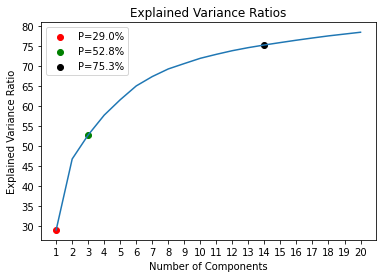

In [81]:
#displaying the result in a graph
plt.title('Explained Variance Ratios')
plt.plot(range(1,21),explainedVarianceRatios[:20])
plt.xticks(ticks=range(1,21))
plt.yticks(ticks=range(25,85,5))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.scatter(1,explainedVarianceRatios[0],c='red',label='P=29.0%')
plt.scatter(3,explainedVarianceRatios[2],c='green',label='P=52.8%')
plt.scatter(14,explainedVarianceRatios[13],c='black',label='P=75.3%')
plt.legend()
plt.show()
ratio_25 = explainedVarianceRatios[0]
ratio_50 = explainedVarianceRatios[2]
ratio_75 = explainedVarianceRatios[13]

In [82]:
#calculating exp. variance ratios between 41 and 150
explainedVarianceRatios = []
for i in range(41,151):
    my_PCA = PCA(n_components=i)
    my_PCA.fit_transform(new_train_image)
    explainedVarianceRatios.append(my_PCA.explained_variance_ratio_.sum())

In [83]:
#printing the results
for item in enumerate(explainedVarianceRatios,41):
    print(item)

(41, 0.8469789273254591)
(42, 0.8489141542057982)
(43, 0.8508907169708778)
(44, 0.8527079652994511)
(45, 0.854451549493062)
(46, 0.8561738835484259)
(47, 0.8578555971128159)
(48, 0.8595032771419486)
(49, 0.8610963280684214)
(50, 0.8626573330642302)
(51, 0.8641725049708084)
(52, 0.8656245701426207)
(53, 0.8671064472439964)
(54, 0.8685443218291352)
(55, 0.869947214662065)
(56, 0.8713122416560866)
(57, 0.8726089561783124)
(58, 0.8739196042528212)
(59, 0.8751997620917635)
(60, 0.8764365034191599)
(61, 0.8776223171261611)
(62, 0.8788299515260096)
(63, 0.8800361972299205)
(64, 0.8812087323415926)
(65, 0.8823260931904047)
(66, 0.8834960500085566)
(67, 0.8845729768167587)
(68, 0.8857030330908898)
(69, 0.8867443329003128)
(70, 0.8877714134786198)
(71, 0.8888183478738365)
(72, 0.8897964014480189)
(73, 0.890777712515626)
(74, 0.8917625693583181)
(75, 0.8926788132466)
(76, 0.8936192091302108)
(77, 0.8945455332623246)
(78, 0.8954453418968269)
(79, 0.8959905894671559)
(80, 0.8967929826928362)
(81, 0

In [84]:
#trying to find P = 95% 
explainedVarianceRatios = []
for i in range(151,251):
    my_PCA = PCA(n_components=i)
    my_PCA.fit_transform(new_train_image)
    explainedVarianceRatios.append(my_PCA.explained_variance_ratio_.sum()*100)

In [85]:
#printing the results
for item in enumerate(explainedVarianceRatios,151):
    print(item)

(151, 93.73523978847558)
(152, 93.77675333400049)
(153, 93.81463500154223)
(154, 93.85270135057722)
(155, 93.88559729120645)
(156, 93.92251457630107)
(157, 93.96049644760215)
(158, 93.99936551513048)
(159, 94.03540377248065)
(160, 94.07011127527406)
(161, 94.10709876795093)
(162, 94.13989864724745)
(163, 94.1753273701138)
(164, 94.20978002677889)
(165, 94.24750346969415)
(166, 94.2860168160476)
(167, 94.31739053267759)
(168, 94.35231985595797)
(169, 94.38637194864647)
(170, 94.41918750372133)
(171, 94.44800822149098)
(172, 94.4770614430114)
(173, 94.51882823557445)
(174, 94.550689635356)
(175, 94.58151224020457)
(176, 94.61529437608843)
(177, 94.64264580636559)
(178, 94.67761121190512)
(179, 94.70552908702933)
(180, 94.73861713035812)
(181, 94.76657504284553)
(182, 94.79979995746372)
(183, 94.83238374885462)
(184, 94.85892088645987)
(185, 94.8930369381771)
(186, 94.92076582076929)
(187, 94.94828900855843)
(188, 94.97710259726927)
(189, 95.00476087214096)
(190, 95.03683837407306)
(191, 

In [86]:
#decreasing the size of the results for displaying a nice graph
y = explainedVarianceRatios[29:44]
y

[94.73861713035812,
 94.76657504284553,
 94.79979995746372,
 94.83238374885462,
 94.85892088645987,
 94.8930369381771,
 94.92076582076929,
 94.94828900855843,
 94.97710259726927,
 95.00476087214096,
 95.03683837407306,
 95.06547123988645,
 95.09333626060439,
 95.12635572384363,
 95.1526524060363]

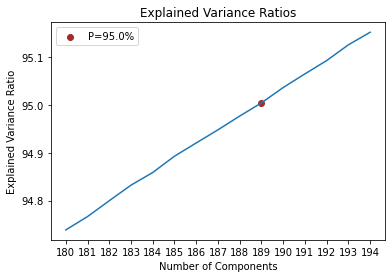

In [87]:
#displaying the results in a graph
plt.title('Explained Variance Ratios')
plt.plot(range(180,195),y)
plt.xticks(ticks=range(180,195))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.scatter(189,y[9],c='brown',label='P=95.0%')
plt.legend()
plt.show()
ratio_95 = y[9]

In [88]:
#creating a dictionary to use dataFrame later
variance_data = {'P':['25%','50%','75%','95%'],'Results':[str(round(ratio_25,2))+"%",
                                                          str(round(ratio_50,2))+"%",
                                                          str(round(ratio_75,2))+"%",
                                                          str(round(ratio_95,2))+"%"],
                 'n_components':[1,3,14,189]}

In [89]:
# creating dataFrame that holds P results and n_components
variance_df = pd.DataFrame(variance_data)

In [90]:
#displaying the results
variance_df

,P,Results,n_components
0,25%,29.04%,1
1,50%,52.81%,3
2,75%,75.32%,14
3,95%,95.0%,189


## n_components = 1$\rightarrow$ P$\approx$ 25%

In [91]:
#reducing dimension to 1D
my_PCA = PCA(n_components=1)

In [92]:
# transforming the train & test arrays
Ptrain = my_PCA.fit_transform(new_train_image)
Ptest = my_PCA.fit_transform(new_test_image)

In [93]:
#displaying the new shape of the train dataset
Ptrain.shape

(60000, 1)

In [94]:
#displaying the new shape of the test dataset
Ptest.shape

(10000, 1)

## <i> K-Neighbors </i>

In [95]:
#creating an instance
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [96]:
#fitting the model
%%time
knn.fit(Ptrain,train_labels)

Wall time: 123 ms


KNeighborsClassifier()

In [97]:
#predicting new labels
knn_predict = knn.predict(Ptest)

In [98]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,knn_predict))
knn_score_25 = accuracy_score(test_labels,knn_predict)

Accuracy Score: 0.251


In [99]:
#displaying misclasifed samples 
print("Misclassified Samples:", (test_labels != knn_predict).sum())

Misclassified Samples: 7490


In [100]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,knn_predict)

Wall time: 8.03 ms


array([[237, 106, 138, 115, 159,  15,  73,  19,  81,  57],
       [143, 324,  60, 137,  32,   4,  53,   5, 126, 116],
       [220, 125, 175,  81, 164,  11,  75,   4,  76,  69],
       [177, 203,  73, 147,  83,  19,  76,  22, 120,  80],
       [218,  83, 222,  97, 210,   7,  82,   6,  44,  31],
       [ 20,  19,  12,  11,   0, 494,   8, 348,  12,  76],
       [200, 130, 175,  95, 125,  18,  84,  25,  78,  70],
       [ 21,  14,  11,   8,   1, 361,  10, 503,   4,  67],
       [154, 267,  66, 123,  65,  21,  55,  27, 125,  97],
       [142, 201,  41,  73,  12,  79,  61,  89,  91, 211]], dtype=int64)

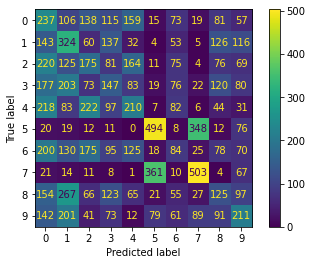

Wall time: 691 ms


In [101]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(knn,Ptest,test_labels)
plt.show()

In [102]:
# to display the image retransform the original shape
inv_test = my_PCA.inverse_transform(Ptest)

In [103]:
#testing whether it works or not
inv_test.shape

(10000, 784)

In [104]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 25%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()
    

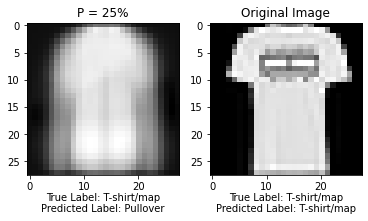

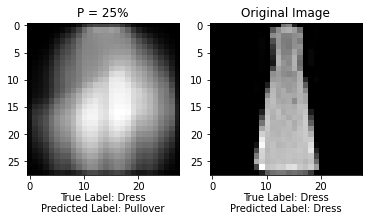

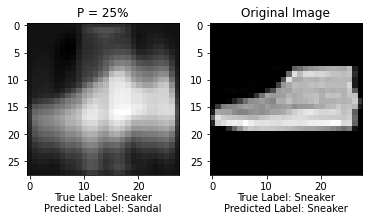

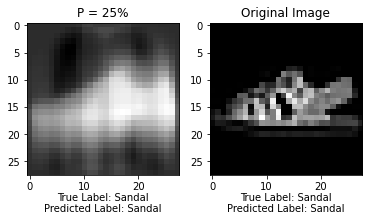

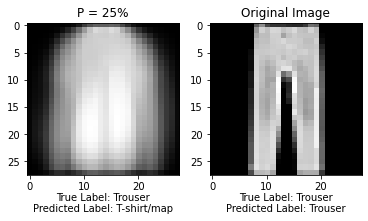

In [105]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Perceptron </i>

In [106]:
#creating an instance
perceptron = Perceptron(max_iter=500, eta0=0.01,random_state=0)

In [107]:
#fitting the model
perceptron.fit(Ptrain,train_labels)

Perceptron(eta0=0.01, max_iter=500)

In [108]:
#predict new labels
%%time
percepton_prediction = perceptron.predict(Ptest)

Wall time: 1 ms


In [109]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,percepton_prediction))
perceptron_score_25 = accuracy_score(test_labels,percepton_prediction)

Accuracy Score: 0.1363


In [110]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != percepton_prediction).sum())

Misclassified Samples: 8637


In [111]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,percepton_prediction)

Wall time: 13 ms


array([[717, 166, 117,   0,   0,   0,   0,   0,   0,   0],
       [344, 557,  99,   0,   0,   0,   0,   0,   0,   0],
       [707, 204,  89,   0,   0,   0,   0,   0,   0,   0],
       [565, 297, 138,   0,   0,   0,   0,   0,   0,   0],
       [857,  91,  52,   0,   0,   0,   0,   0,   0,   0],
       [  1,  23, 976,   0,   0,   0,   0,   0,   0,   0],
       [620, 233, 147,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3, 996,   0,   0,   0,   0,   0,   0,   0],
       [395, 415, 190,   0,   0,   0,   0,   0,   0,   0],
       [114, 336, 550,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

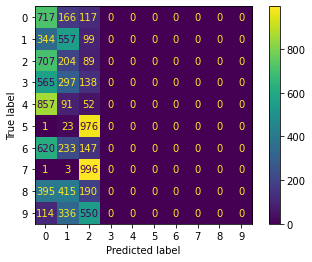

Wall time: 419 ms


In [112]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(perceptron,Ptest,test_labels)
plt.show()

In [113]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 25%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

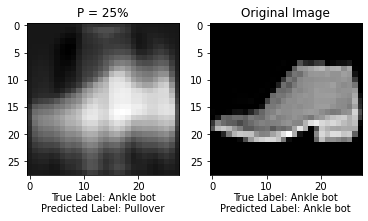

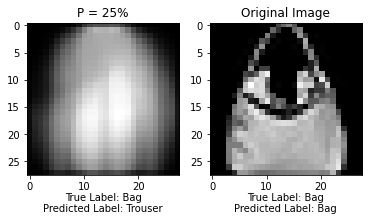

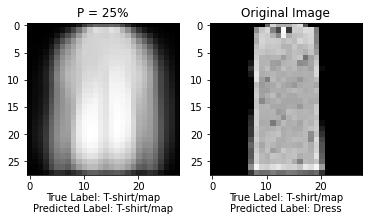

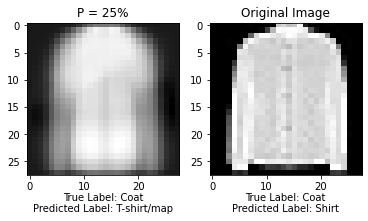

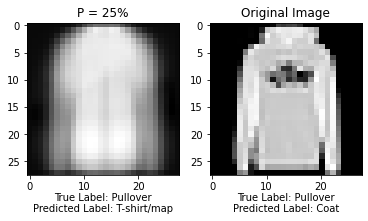

In [114]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> SVM </i>

In [115]:
#creating an instance
svm = SVC(kernel = 'rbf',C=100,random_state=0)

In [116]:
#fitting the model
%%time
svm.fit(Ptrain,train_labels)

Wall time: 8min 31s


SVC(C=100, random_state=0)

In [117]:
#predicting new labels
%%time
svm_prediction = svm.predict(Ptest)

Wall time: 12.8 s


In [118]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,svm_prediction))
svm_score_25 = accuracy_score(test_labels,svm_prediction)

Accuracy Score: 0.3142


In [119]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != svm_prediction).sum())

Misclassified Samples: 6858


In [120]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,svm_prediction)

Wall time: 13 ms


array([[  0, 230,  33, 134, 446,   1,   0,  27,   0, 129],
       [  0, 696,   1,  76,  40,   0,   0,   4,   0, 183],
       [  0, 250,  99,  96, 419,   0,   0,   9,   0, 127],
       [  0, 419,   1, 156, 227,   0,   0,  31,   0, 166],
       [  0, 145,  74, 127, 582,   1,   0,   9,   0,  62],
       [  0,  13,   0,   0,   0, 343,   0, 505,   0, 139],
       [  0, 274,  68, 112, 350,   0,   0,  39,   0, 157],
       [  0,   1,   0,   0,   0, 139,   0, 752,   0, 108],
       [  0, 514,   8, 109,  94,   2,   0,  36,   0, 237],
       [  0, 320,   0,  23,   5,   1,   0, 137,   0, 514]], dtype=int64)

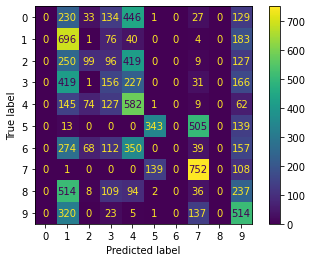

Wall time: 13.2 s


In [121]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(svm,Ptest,test_labels)
plt.show()

In [122]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 25%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

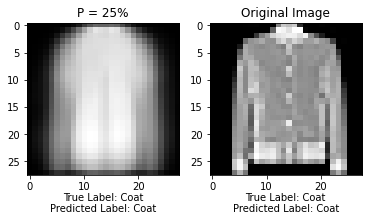

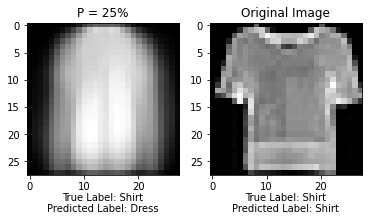

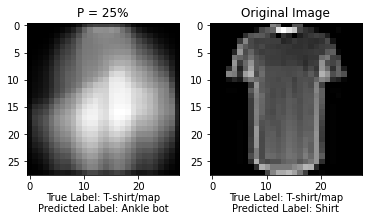

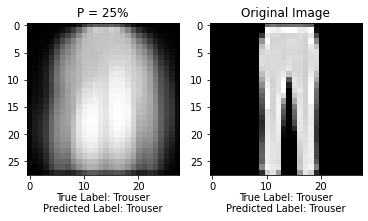

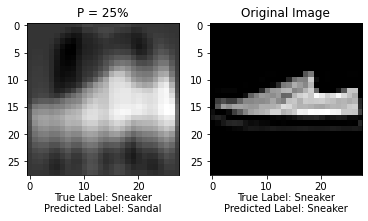

In [123]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Decision Trees </i>

In [124]:
#creating an instace
decision_tree = DecisionTreeClassifier(criterion="entropy")

In [125]:
#fitting the model
decision_tree.fit(Ptrain,train_labels)

DecisionTreeClassifier(criterion='entropy')

In [126]:
#predicting new labels
tree_predict=decision_tree.predict(Ptest)

In [127]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,tree_predict))
decision_tree_score_25 = accuracy_score(test_labels,tree_predict)

Accuracy Score: 0.2255


In [128]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != tree_predict).sum())

Misclassified Samples: 7745


In [129]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,tree_predict)

Wall time: 7 ms


array([[140,  83, 140, 133, 171,  31, 128,  18,  94,  62],
       [ 90, 198,  79, 142,  71,   8,  81,   6, 173, 152],
       [130,  92, 175, 104, 183,  10, 141,   7,  88,  70],
       [122, 129,  95, 143, 110,  20, 110,  20, 152,  99],
       [154,  70, 179, 118, 213,   8, 120,   8,  87,  43],
       [ 12,  19,  13,  21,   6, 437,  22, 360,  38,  72],
       [139,  91, 156, 105, 162,  21, 127,  17, 101,  81],
       [ 19,  12,  14,  12,   4, 335,  23, 469,  28,  84],
       [ 92, 190,  87, 126,  74,  26, 104,  35, 137, 129],
       [ 75, 126,  57,  97,  33,  91,  80,  90, 135, 216]], dtype=int64)

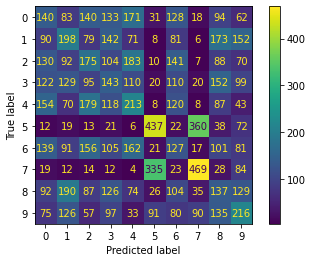

Wall time: 437 ms


In [130]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(decision_tree,Ptest,test_labels)
plt.show()

In [131]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 25%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

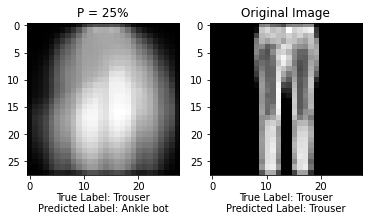

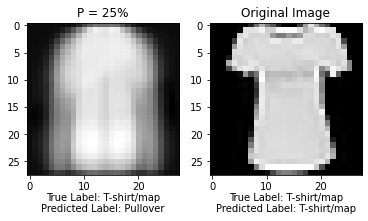

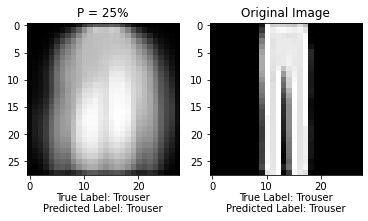

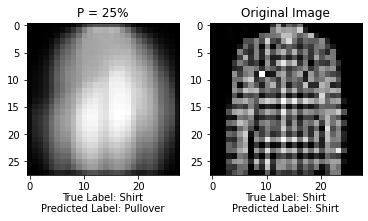

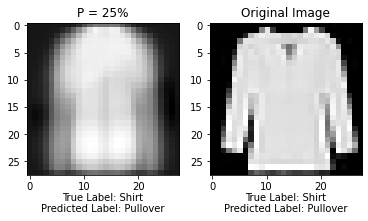

In [132]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Random Forests </i>

In [133]:
#creating an instance
random_forest = RandomForestClassifier(criterion="entropy",n_estimators = 100 , random_state = 0)

In [134]:
#fitting the model
random_forest.fit(Ptrain,train_labels)

RandomForestClassifier(criterion='entropy', random_state=0)

In [135]:
#predicting new labels
random_forest_pred = random_forest.predict(Ptest)

In [136]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,random_forest_pred))
random_forest_score_25 = accuracy_score(test_labels,random_forest_pred)

Accuracy Score: 0.2256


In [137]:
#displaying the misclassified labels
print("Misclassified Samples:", (test_labels != random_forest_pred).sum())

Misclassified Samples: 7744


In [138]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,random_forest_pred)

Wall time: 8 ms


array([[140,  83, 140, 133, 171,  31, 128,  18,  94,  62],
       [ 90, 198,  79, 142,  71,   8,  81,   6, 173, 152],
       [130,  92, 175, 104, 183,  10, 141,   7,  88,  70],
       [122, 129,  95, 142, 110,  20, 110,  20, 153,  99],
       [154,  70, 180, 118, 213,   8, 119,   8,  87,  43],
       [ 12,  19,  13,  21,   6, 437,  22, 361,  38,  71],
       [139,  91, 156, 105, 162,  21, 127,  17, 101,  81],
       [ 19,  12,  14,  12,   4, 334,  23, 471,  28,  83],
       [ 92, 190,  87, 126,  74,  26, 104,  35, 137, 129],
       [ 75, 126,  57,  97,  33,  91,  80,  90, 135, 216]], dtype=int64)

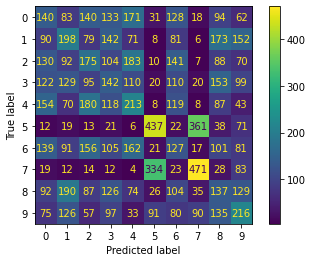

Wall time: 985 ms


In [139]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(random_forest,Ptest,test_labels)
plt.show()

In [140]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 25%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

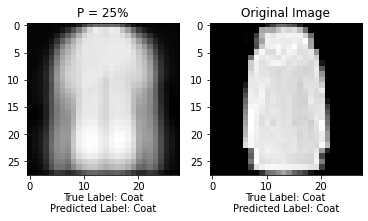

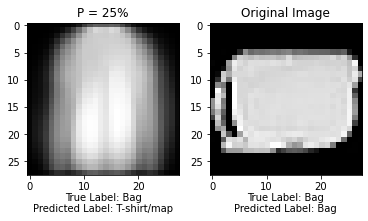

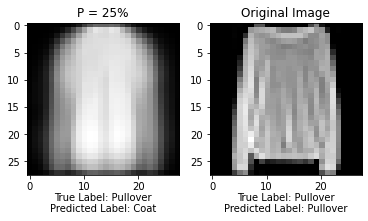

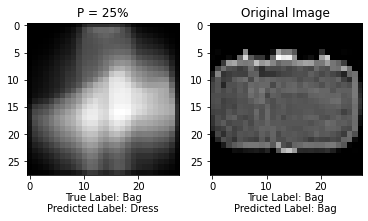

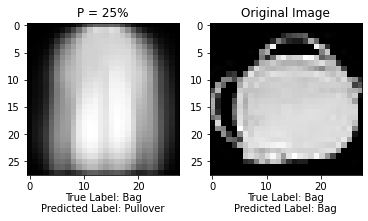

In [141]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## n_components = 3$\rightarrow$ P$\approx$ 50%

In [142]:
#reducing dimension to 3D
my_PCA = PCA(n_components=3)

In [143]:
#transforming train and test image datasets
Ptrain = my_PCA.fit_transform(new_train_image)
Ptest = my_PCA.fit_transform(new_test_image)

In [144]:
#testing whether it works
Ptrain.shape

(60000, 3)

In [145]:
#testing whether it works
Ptest.shape

(10000, 3)

## <i> K-Neighbors </i>

In [146]:
#creating an instance
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [147]:
#fitting the model
%%time
knn.fit(Ptrain,train_labels)

Wall time: 91 ms


KNeighborsClassifier()

In [148]:
#predicting new labels
knn_predict = knn.predict(Ptest)

In [149]:
#displaying accuracy score
print("Accuracy Score:",accuracy_score(test_labels,knn_predict))
knn_score_50 = accuracy_score(test_labels,knn_predict)

Accuracy Score: 0.2925


In [150]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != knn_predict).sum())

Misclassified Samples: 7075


In [151]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,knn_predict)

Wall time: 9.02 ms


array([[536,  50,  15, 159,  69,  26,  38,   0,  93,  14],
       [295, 344,   0, 330,   3,   2,   8,   0,   8,  10],
       [296,   2,  76,  14,  22, 173,  43,   0, 102, 272],
       [578, 107,   1, 189,  27,   7,  17,   0,  71,   3],
       [404,  11,  57,  36,  71,  62,  58,   0,  98, 203],
       [  1,   0,  10,   0,   3, 756,  10, 109, 108,   3],
       [321,  13,  51,  70,  40, 165,  41,   0, 128, 171],
       [  0,   0,   0,   0,   2, 587,   0, 275, 135,   1],
       [ 50,   2,  24,  12,  15, 164,  35,   8, 637,  53],
       [  5,  15, 124,   0, 229,  45,  53,  35, 494,   0]], dtype=int64)

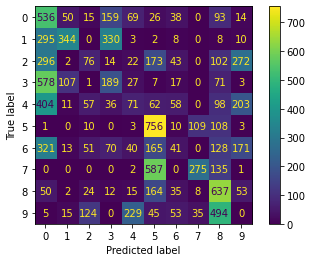

Wall time: 760 ms


In [152]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(knn,Ptest,test_labels)
plt.show()

In [153]:
# to display properly retransforming the dimension reduced array to original shape
inv_test = my_PCA.inverse_transform(Ptest)

In [154]:
#displaying the shape
inv_test.shape

(10000, 784)

In [155]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 50%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

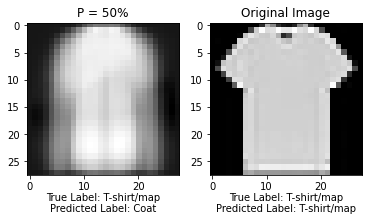

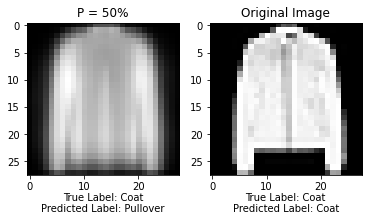

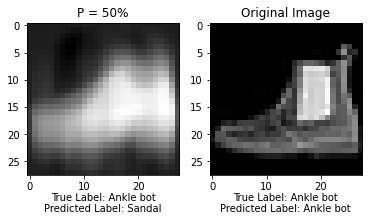

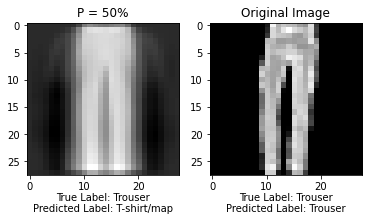

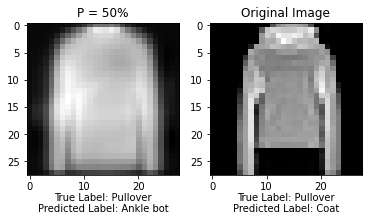

In [156]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Perceptron </i>

In [157]:
#creating an instance
perceptron = Perceptron(max_iter=500, eta0=0.01,random_state=0)

In [158]:
#fitting the model
perceptron.fit(Ptrain,train_labels)

Perceptron(eta0=0.01, max_iter=500)

In [159]:
#predicting new labels
%%time
percepton_prediction = perceptron.predict(Ptest)

Wall time: 2 ms


In [160]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,percepton_prediction))
perceptron_score_50 = accuracy_score(test_labels,percepton_prediction)

Accuracy Score: 0.2298


In [161]:
#displaying the misclassified labels
print("Misclassified Samples:", (test_labels != percepton_prediction).sum())

Misclassified Samples: 7702


In [162]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,percepton_prediction)

Wall time: 8.99 ms


array([[737,  43,   1, 109,   1,   1,   1,   0,   4, 103],
       [ 68, 905,   0,  13,   0,   2,   0,   0,   0,  12],
       [656,   2,   0,  13,   3,   0,   0,   0,   3, 323],
       [309, 585,   0,  63,   2,  14,   1,   0,   0,  26],
       [801,  15,   0,  14,   1,   0,   0,   0,   2, 167],
       [  0,   0,  19,   6,   0, 120,  29,  18, 127, 681],
       [632,  10,   0,  52,   2,   0,   1,   0,   8, 295],
       [  0,   0,   9,   0,   0,  66,   1,  32, 272, 620],
       [208,   9,  58,  44,  11,   4,   8,  26, 436, 196],
       [  2,   0, 603,   1,   4,  20,  19,  49, 299,   3]], dtype=int64)

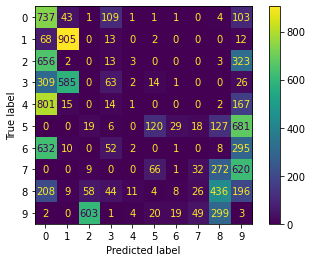

Wall time: 686 ms


In [163]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(perceptron,Ptest,test_labels)
plt.show()

In [164]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 50%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

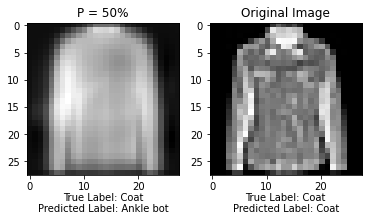

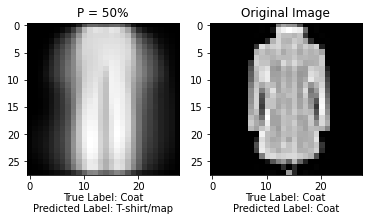

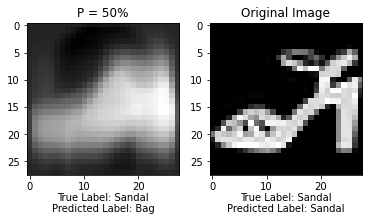

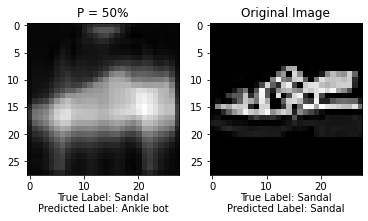

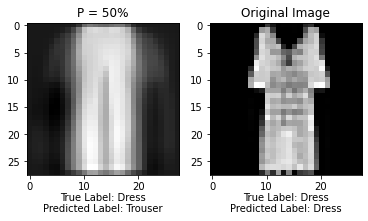

In [165]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> SVM </i>

In [166]:
#creating a new instance
svm = SVC(kernel = 'rbf',C=100,random_state=0)

In [167]:
#fitting the model
%%time
svm.fit(Ptrain,train_labels)

Wall time: 1min 11s


SVC(C=100, random_state=0)

In [168]:
#predicting new labels
%%time
svm_prediction = svm.predict(Ptest)

Wall time: 8.97 s


In [169]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,svm_prediction))
svm_score_50 = accuracy_score(test_labels,svm_prediction)

Accuracy Score: 0.3157


In [170]:
#displaying misclassifed samples
print("Misclassified Samples:", (test_labels != svm_prediction).sum())

Misclassified Samples: 6843


In [171]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,svm_prediction)

Wall time: 16 ms


array([[595,  77,  10,  89,  50,  29,   7,   0, 131,  12],
       [ 82, 556,   0,  50,   1,   2,   0,   0, 298,  11],
       [300,   7,  86,   4,  11, 127,  16,   5, 104, 340],
       [381, 154,   2, 125,   6,  12,   2,   0, 314,   4],
       [453,  22,  49,  11,  53,  41,  17,  10,  98, 246],
       [  0,   0,   6,   0,   1, 709,   8, 162, 110,   4],
       [347,  57,  60,  25,  29, 116,   6,   9, 145, 206],
       [  0,   0,   0,   0,   0, 481,   1, 385, 133,   0],
       [ 60,   4,  56,   9,   4, 153,  10,  12, 642,  50],
       [  1,   1,  77,   0,  83,  31, 124,  52, 631,   0]], dtype=int64)

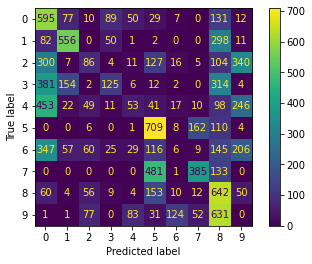

Wall time: 9.44 s


In [172]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(svm,Ptest,test_labels)
plt.show()

In [173]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 50%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

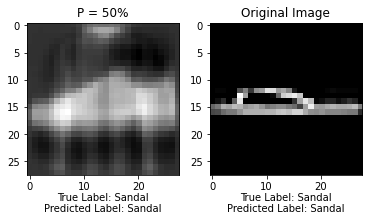

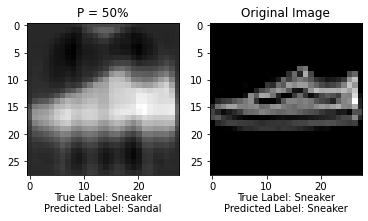

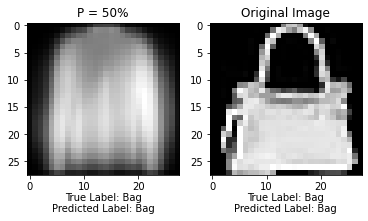

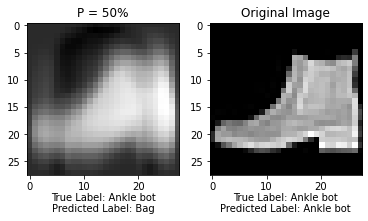

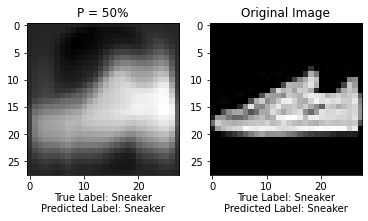

In [174]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Decision Trees </i>

In [175]:
#creating a new instance
decision_tree = DecisionTreeClassifier(criterion="entropy")

In [176]:
#fitting the model
decision_tree.fit(Ptrain,train_labels)

DecisionTreeClassifier(criterion='entropy')

In [177]:
#predicting new labels
tree_predict=decision_tree.predict(Ptest)

In [178]:
#displaying accuracy score
print("Accuracy Score:",accuracy_score(test_labels,tree_predict))
decision_tree_score_50 = accuracy_score(test_labels,tree_predict)

Accuracy Score: 0.2496


In [179]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != tree_predict).sum())

Misclassified Samples: 7504


In [180]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,tree_predict)

Wall time: 16 ms


array([[357, 110,  26, 131, 105,  21,  96,   0, 135,  19],
       [ 51, 244,   1, 638,   8,   3,  19,   0,  26,  10],
       [173,   3,  60,  13,  42, 143, 174,   1,  76, 315],
       [279, 159,  13, 308,  51,   5,  36,   0, 144,   5],
       [228,  14,  83,  41,  81,  44, 215,   0,  63, 231],
       [  7,   0,  16,   0,   7, 475,   9, 134, 104, 248],
       [232,  31,  40,  63,  81, 117, 136,   0, 100, 200],
       [ 20,   0,  27,   0,   3, 540,  11, 287,  71,  41],
       [ 68,  14,  39,  15,  35, 144,  58,  12, 547,  68],
       [ 31,   3, 301,   1, 205,  57, 234,  40, 127,   1]], dtype=int64)

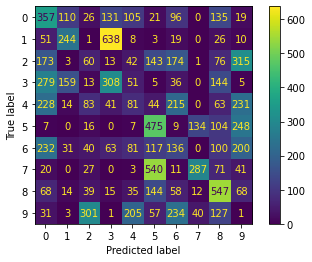

Wall time: 446 ms


In [181]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(decision_tree,Ptest,test_labels)
plt.show()

In [182]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 50%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

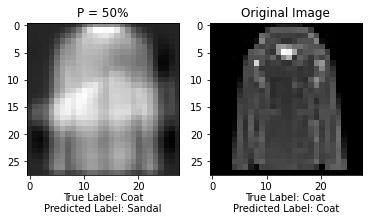

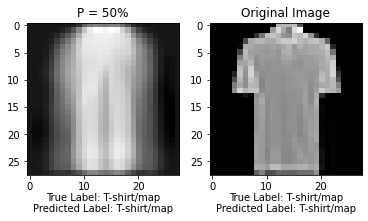

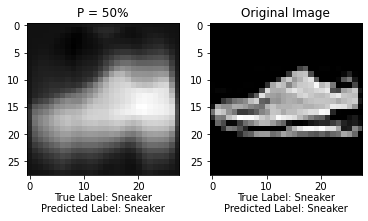

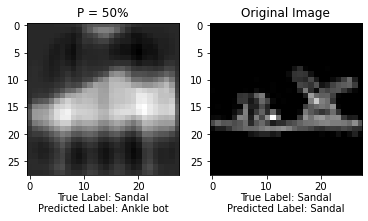

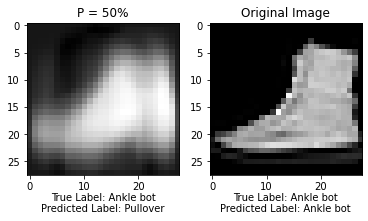

In [183]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Random Forests </i>

In [184]:
#creating a new instance
random_forest = RandomForestClassifier(criterion="entropy",n_estimators = 100 , random_state = 0)

In [185]:
#fitting the model
random_forest.fit(Ptrain,train_labels)

RandomForestClassifier(criterion='entropy', random_state=0)

In [186]:
#predicting new labels
random_forest_pred = random_forest.predict(Ptest)

In [187]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,random_forest_pred))
random_forest_score_50 = accuracy_score(test_labels,random_forest_pred)

Accuracy Score: 0.306


In [188]:
#displaying the misclassified samples
print("Misclassified Samples:", (test_labels != random_forest_pred).sum())

Misclassified Samples: 6940


In [189]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,random_forest_pred)

Wall time: 11 ms


array([[554,  38,  16, 139,  65,  23,  33,   0, 119,  13],
       [261, 320,   0, 352,   7,   2,  33,   0,  13,  12],
       [276,   2,  63,  10,  29, 135,  50,   0, 108, 327],
       [446, 151,   3, 273,  28,   8,  17,   0,  72,   2],
       [387,  11,  58,  29,  78,  51,  57,   0,  89, 240],
       [  1,   0,   8,   0,   6, 762,   9, 101, 110,   3],
       [298,  13,  48,  64,  39, 132,  57,   0, 152, 197],
       [  0,   0,   1,   0,   9, 555,   2, 289, 143,   1],
       [ 32,   3,  36,  11,  15, 151,  29,  13, 664,  46],
       [  1,   1, 140,   0, 247,  41, 104,  35, 431,   0]], dtype=int64)

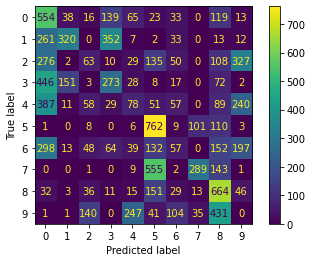

Wall time: 661 ms


In [190]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(random_forest,Ptest,test_labels)
plt.show()

In [191]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 50%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

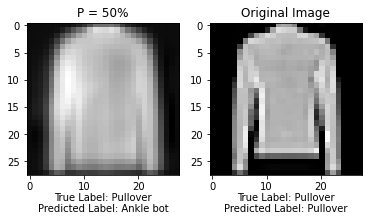

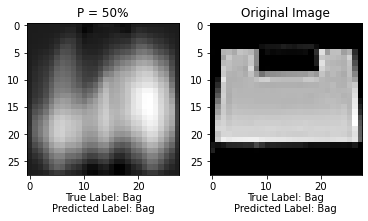

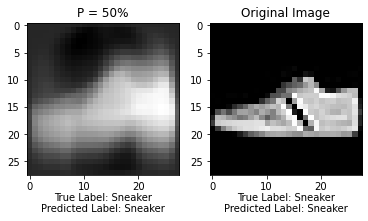

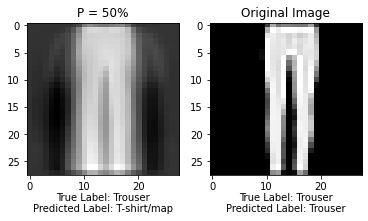

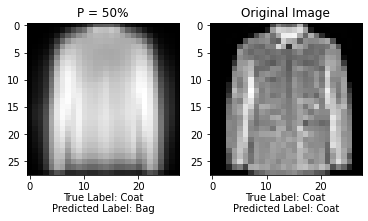

In [192]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## n_components = 14$\rightarrow$ P$\approx$ 75%

In [193]:
#reducing dimension to 14D
my_PCA = PCA(n_components=14)

In [194]:
#transforming train and test image datasets
Ptrain = my_PCA.fit_transform(new_train_image)
Ptest = my_PCA.fit_transform(new_test_image)

In [195]:
#testing whether it works
Ptrain.shape

(60000, 14)

In [196]:
#testing whether it works
Ptest.shape

(10000, 14)

## <i> K-Neighbors </i>

In [197]:
#creating a new instance
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [198]:
#fitting the model
%%time
knn.fit(Ptrain,train_labels)

Wall time: 277 ms


KNeighborsClassifier()

In [199]:
#predicting new labels
knn_predict = knn.predict(Ptest)

In [200]:
#printing accuracy score
print("Accuracy Score:",accuracy_score(test_labels,knn_predict))
knn_score_75 = accuracy_score(test_labels,knn_predict)

Accuracy Score: 0.5581


In [201]:
#displaying misclassified samples
print("Misclassified Samples:", (test_labels != knn_predict).sum())

Misclassified Samples: 4419


In [202]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,knn_predict)

Wall time: 8 ms


array([[739,   6,  19, 130,   4,  18,  66,   1,  12,   5],
       [ 20, 932,   1,  26,   5,   2,   3,   0,   4,   7],
       [ 60,   4, 308,  43, 163,  75,  97,   3,  52, 195],
       [113,  36,   8, 785,  31,   4,  18,   0,   3,   2],
       [ 20,   3, 165,  63, 492,  25,  68,   0,  55, 109],
       [  0,   1,  19,   0,   0, 473,  11, 469,  12,  15],
       [208,   1,  78, 102, 177,  75, 167,   4,  61, 127],
       [  0,   0,   1,   0,   1, 214,   3, 766,  15,   0],
       [  7,   1,   5,   9,   3,  22,  15,  23, 911,   4],
       [  5,   0, 198,   0, 143, 417, 185,  11,  33,   8]], dtype=int64)

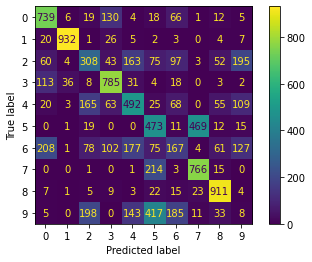

Wall time: 3.89 s


In [203]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(knn,Ptest,test_labels)
plt.show()

In [204]:
# to display properly retransforming the dimension reduced array to original shape
inv_test = my_PCA.inverse_transform(Ptest)

In [205]:
#displaying the shape
inv_test.shape

(10000, 784)

In [206]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 75%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

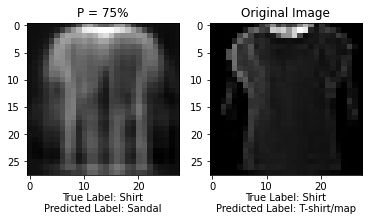

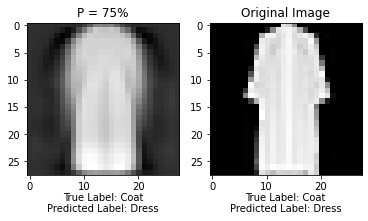

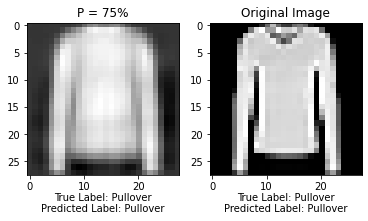

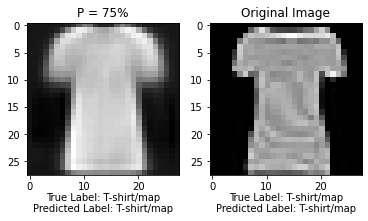

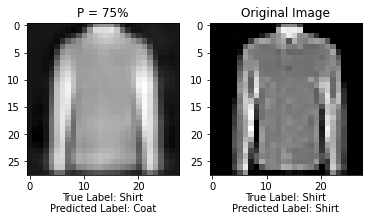

In [207]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Perceptron </i>

In [208]:
#creating a new instace
perceptron = Perceptron(max_iter=500, eta0=0.01,random_state=0)

In [209]:
#fitting the model
perceptron.fit(Ptrain,train_labels)

Perceptron(eta0=0.01, max_iter=500)

In [210]:
#predicting new class labels
%%time
perceptron_prediction = perceptron.predict(Ptest)

Wall time: 1.99 ms


In [211]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,perceptron_prediction))
perceptron_score_75 = accuracy_score(test_labels,perceptron_prediction)

Accuracy Score: 0.4743


In [212]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != percepton_prediction).sum())

Misclassified Samples: 7702


In [213]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,percepton_prediction)

Wall time: 11 ms


array([[737,  43,   1, 109,   1,   1,   1,   0,   4, 103],
       [ 68, 905,   0,  13,   0,   2,   0,   0,   0,  12],
       [656,   2,   0,  13,   3,   0,   0,   0,   3, 323],
       [309, 585,   0,  63,   2,  14,   1,   0,   0,  26],
       [801,  15,   0,  14,   1,   0,   0,   0,   2, 167],
       [  0,   0,  19,   6,   0, 120,  29,  18, 127, 681],
       [632,  10,   0,  52,   2,   0,   1,   0,   8, 295],
       [  0,   0,   9,   0,   0,  66,   1,  32, 272, 620],
       [208,   9,  58,  44,  11,   4,   8,  26, 436, 196],
       [  2,   0, 603,   1,   4,  20,  19,  49, 299,   3]], dtype=int64)

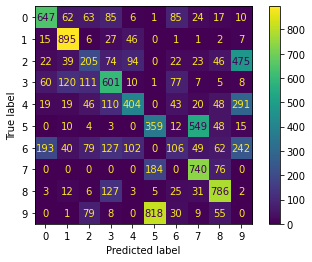

Wall time: 685 ms


In [214]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(perceptron,Ptest,test_labels)
plt.show()

In [215]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 75%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

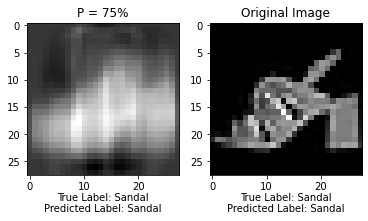

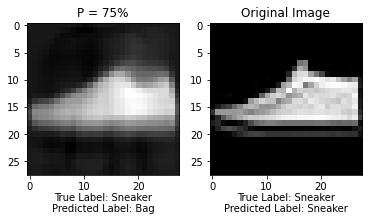

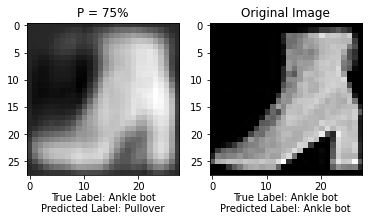

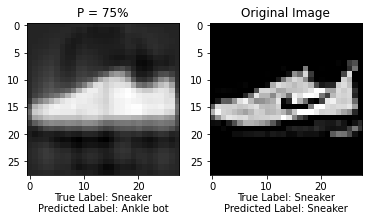

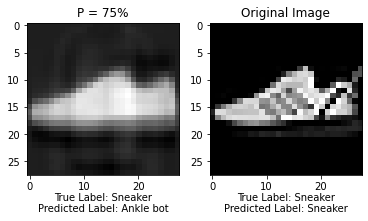

In [216]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> SVM </i>

In [217]:
#creating a new instance
svm = SVC(kernel = 'rbf',C=100,random_state=0)

In [218]:
#fitting the model
%%time
svm.fit(Ptrain,train_labels)

Wall time: 46.2 s


SVC(C=100, random_state=0)

In [219]:
#predicting new image labels
%%time
svm_prediction = svm.predict(Ptest)

Wall time: 6.19 s


In [220]:
#printing the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,svm_prediction))
svm_score_75 = accuracy_score(test_labels,svm_prediction)

Accuracy Score: 0.4153


In [221]:
#printing the misclassified samples
print("Misclassified Samples:", (test_labels != svm_prediction).sum())

Misclassified Samples: 5847


In [222]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,svm_prediction)

Wall time: 14 ms


array([[707,   4,  15,  88,  13,  46,  74,   4,  47,   2],
       [ 24, 706,  69,  95,  50,   5,  43,   0,   7,   1],
       [104,   6, 191,  32, 135,  77, 121,  23, 166, 145],
       [219, 134,  50, 529,  25,   7,  17,   0,  16,   3],
       [ 60,   7, 196,  29, 317,  49, 140,   7, 107,  88],
       [ 34,   0,   9,   0,   6, 436,  10, 300, 179,  26],
       [193,   7, 124,  63, 109,  51, 152,  41, 130, 130],
       [ 18,   0,   2,   0,   1, 264,   4, 334, 368,   9],
       [ 13,   1,   6,  84,  32,  21,  49,  13, 777,   4],
       [160,   1, 151,   3, 149, 319, 197,   3,  13,   4]], dtype=int64)

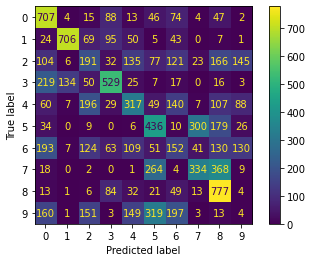

Wall time: 6.62 s


In [223]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(svm,Ptest,test_labels)
plt.show()

In [224]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 75%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

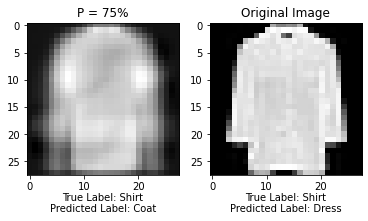

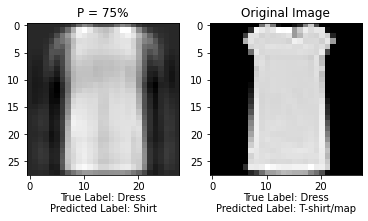

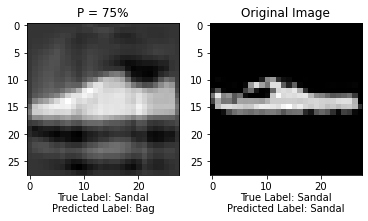

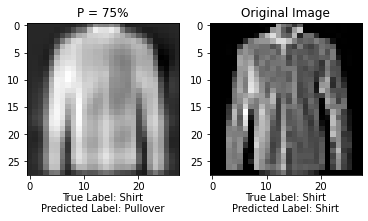

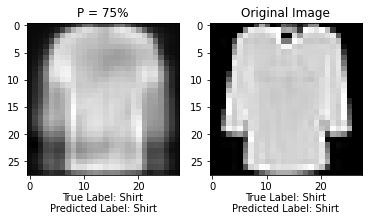

In [225]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Decisions Trees </i>

In [226]:
#creating a new instance
decision_tree = DecisionTreeClassifier(criterion="entropy")

In [227]:
#fitting the model
decision_tree.fit(Ptrain,train_labels)

DecisionTreeClassifier(criterion='entropy')

In [228]:
#predicting new image labels
tree_predict=decision_tree.predict(Ptest)

In [229]:
#printing the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,tree_predict))
decision_tree_score_75 = accuracy_score(test_labels,tree_predict)

Accuracy Score: 0.4679


In [230]:
#printing the misclassified samples
print("Misclassified Samples:", (test_labels != tree_predict).sum())

Misclassified Samples: 5321


In [231]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,tree_predict)

Wall time: 16 ms


array([[646,  14,  32,  90,  28,  26, 145,   1,  15,   3],
       [ 19, 895,   2,  41,   4,   5,  23,   0,   4,   7],
       [ 76,   4, 138,  39, 139, 128,  82,  19,  38, 337],
       [ 72,  46,  53, 698,  56,   7,  47,   2,  15,   4],
       [ 76,   6, 166,  89, 254,  48,  81,  18,  56, 206],
       [ 11,   3,  33,  17,  11, 453,  20, 245,  53, 154],
       [206,  13,  79,  67, 109, 150, 160,  10,  55, 151],
       [  7,   3,  20,   2,   9, 241,   8, 657,  19,  34],
       [ 15,   2,  18,  18,  24,  65,  51,  13, 770,  24],
       [ 34,  14, 290,   7, 251, 147, 193,  21,  35,   8]], dtype=int64)

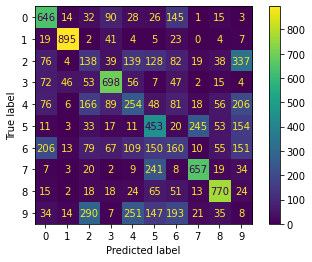

Wall time: 637 ms


In [232]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(decision_tree,Ptest,test_labels)
plt.show()

In [233]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 75%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

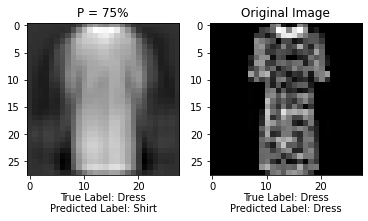

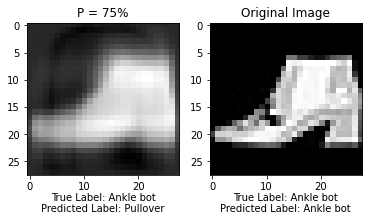

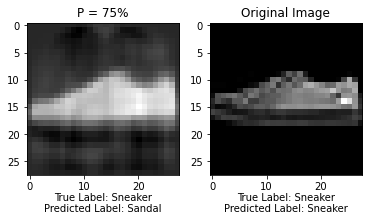

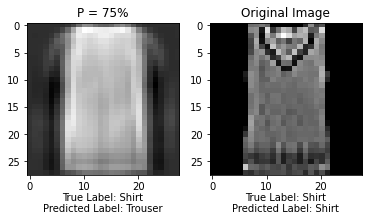

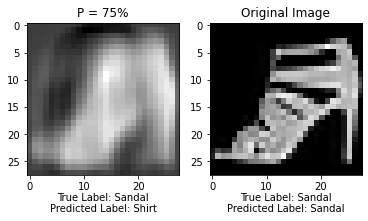

In [234]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Random Forests </i>

In [235]:
#creating a new instance
random_forest = RandomForestClassifier(criterion="entropy",n_estimators = 100 , random_state = 0)

In [236]:
#fitting the model
random_forest.fit(Ptrain,train_labels)

RandomForestClassifier(criterion='entropy', random_state=0)

In [237]:
#predicting new image labels
random_forest_pred = random_forest.predict(Ptest)

In [238]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,random_forest_pred))
random_forest_score_75 = accuracy_score(test_labels,random_forest_pred)

Accuracy Score: 0.5549


In [239]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != random_forest_pred).sum())

Misclassified Samples: 4451


In [240]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,random_forest_pred)

Wall time: 8 ms


array([[794,   6,  11,  79,   5,  13,  69,   0,  18,   5],
       [ 18, 920,   0,  33,   5,   0,   9,   0,   3,  12],
       [ 35,   1, 197,  28, 116,  32,  49,   0,  46, 496],
       [ 59,  19,   3, 860,  22,   3,  24,   0,   7,   3],
       [  8,   0,  55,  76, 402,  12,  38,   0,  46, 363],
       [  0,   0,  30,   1,   4, 577,   4, 360,  17,   7],
       [239,   4,  50,  79, 104,  12, 137,   0,  63, 312],
       [  0,   0,  13,   0,   5, 229,   0, 740,  13,   0],
       [  2,   1,   1,  18,   3,  35,   6,   9, 922,   3],
       [  0,   0, 359,   0, 249, 321,  52,   8,  11,   0]], dtype=int64)

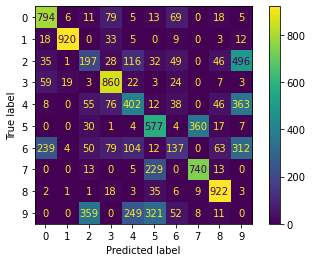

Wall time: 631 ms


In [241]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(random_forest,Ptest,test_labels)
plt.show()

In [242]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 75%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

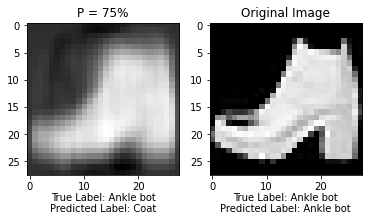

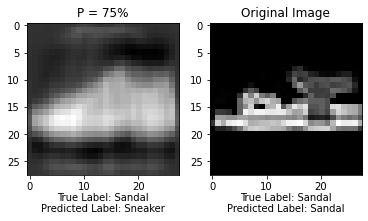

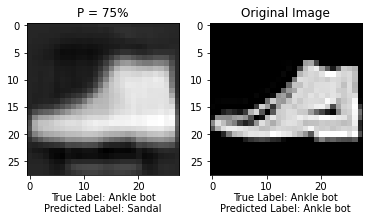

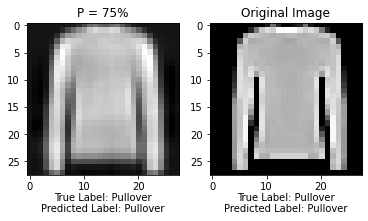

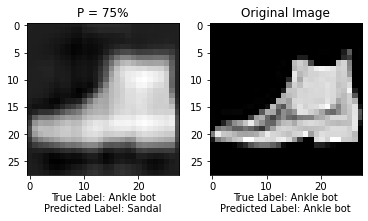

In [243]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## n_components = 189$\rightarrow$ P$\approx$ 95%

In [244]:
#reducing dimension to 189D
my_PCA = PCA(n_components=189) 

In [245]:
#transforming train and test image datasets
Ptrain = my_PCA.fit_transform(new_train_image)
Ptest = my_PCA.fit_transform(new_test_image)

In [246]:
#testing whether it works
Ptrain.shape

(60000, 189)

In [247]:
#testing whether it works
Ptest.shape

(10000, 189)

## <i>K-Neighbors</i>

In [248]:
#creating a new instance
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [249]:
#fitting the model
%%time
knn.fit(Ptrain,train_labels)

Wall time: 3.79 s


KNeighborsClassifier()

In [250]:
#predicting new image labels
%%time
knn_predict = knn.predict(Ptest)

Wall time: 1min 26s


In [251]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,knn_predict))
knn_score_95 = accuracy_score(test_labels,knn_predict)

Accuracy Score: 0.5596


In [252]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != knn_predict).sum())

Misclassified Samples: 4404


In [253]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,knn_predict)

Wall time: 13.1 ms


array([[746,   6,  19, 103,  11,   2,  97,   4,  10,   2],
       [ 22, 906,   1,  45,   9,   0,   8,   1,   3,   5],
       [ 67,   2, 421,  54, 187,   4,  65,   9,  12, 179],
       [171,  33,  27, 636,  76,   0,  52,   0,   3,   2],
       [ 23,   3, 166,  52, 551,   0,  88,  15,  18,  84],
       [  1,   0,  30,   4,   7, 258,  11, 573,  21,  95],
       [233,   2,  99, 117, 172,   3, 218,  17,  30, 109],
       [  0,   0,   5,   0,   2,  45,   1, 904,  24,  19],
       [  7,   1,  13,  19,  21,   5,  12,  28, 885,   9],
       [  4,   0, 318,   0, 186,  91, 152,  85,  93,  71]], dtype=int64)

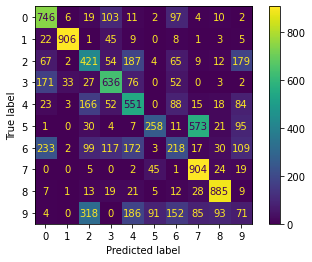

Wall time: 1min 26s


In [254]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(knn,Ptest,test_labels)
plt.show()

In [255]:
# to display properly retransforming the dimension reduced array to original shape
inv_test = my_PCA.inverse_transform(Ptest)

In [256]:
#display the shape
inv_test.shape

(10000, 784)

In [257]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 95%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[knn_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

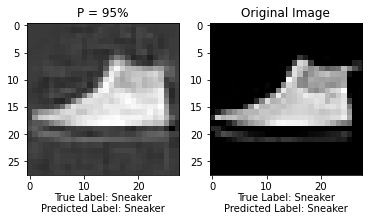

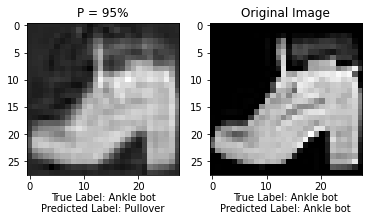

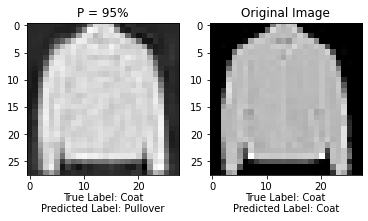

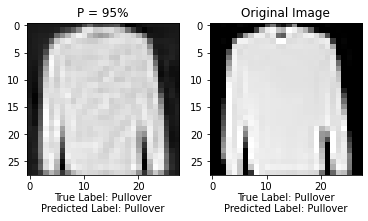

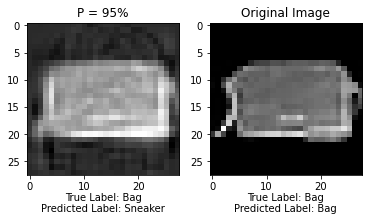

In [258]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Perceptron </i>

In [259]:
#creating a new instance
perceptron = Perceptron(max_iter=500, eta0=0.01,random_state=0)

In [260]:
#fitting the model
perceptron.fit(Ptrain,train_labels)

Perceptron(eta0=0.01, max_iter=500)

In [261]:
#predicting new image labels
%%time
percepton_prediction = perceptron.predict(Ptest)

Wall time: 5 ms


In [262]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,percepton_prediction))
perceptron_score_95 = accuracy_score(test_labels,perceptron_prediction)

Accuracy Score: 0.4555


In [263]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != percepton_prediction).sum())

Misclassified Samples: 5445


In [264]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,percepton_prediction)

Wall time: 12 ms


array([[741,  19,  72,  45,  14,   2,  45,   2,  19,  41],
       [ 15, 827,  37, 106,   2,   0,   4,   0,   1,   8],
       [ 46,  28, 241,  80, 140,   1,  20,   1,  33, 410],
       [ 93,  75, 138, 476,  79,   0, 111,   2,   9,  17],
       [ 22,  44, 107,  67, 450,   0,  42,   2,  49, 217],
       [ 32,   1,  17,   4,   4, 253,  40, 268,  67, 314],
       [251,  26, 130,  68, 160,   0,  89,   4,  53, 219],
       [  0,   0,  10,   0,   0, 185,   5, 706,  77,  17],
       [ 13,   7,  25,  22,  19,  15,  93,  21, 772,  13],
       [  1,   0, 319,   9,   5, 440, 107,  38,  81,   0]], dtype=int64)

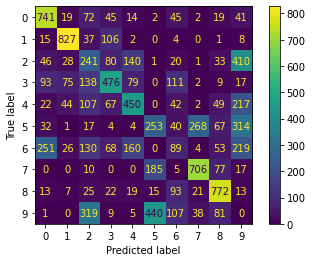

Wall time: 683 ms


In [265]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(perceptron,Ptest,test_labels)
plt.show()

In [266]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 95%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[percepton_prediction_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

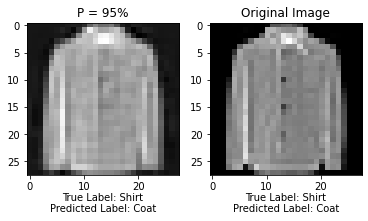

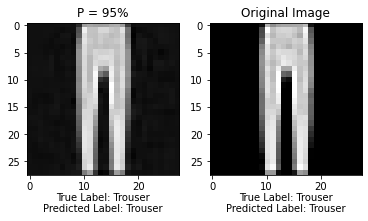

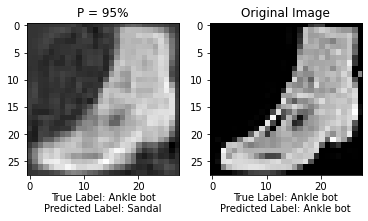

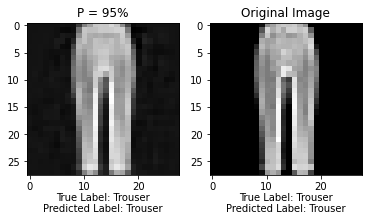

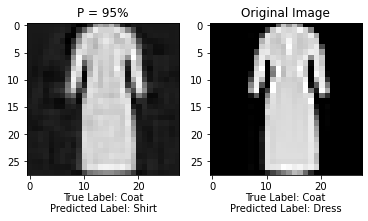

In [267]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> SVM </i>

In [268]:
#creating a new instance
svm = SVC(kernel = 'rbf',C=100,random_state=0)

In [269]:
#fitting the model
%%time
svm.fit(Ptrain,train_labels)

Wall time: 2min 37s


SVC(C=100, random_state=0)

In [270]:
#predicting new image labels
%%time
svm_prediction = svm.predict(Ptest)

Wall time: 43.2 s


In [271]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,svm_prediction))
svm_score_95 = accuracy_score(test_labels,svm_prediction)

Accuracy Score: 0.4846


In [272]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != svm_prediction).sum())

Misclassified Samples: 5154


In [273]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,svm_prediction)

Wall time: 8.02 ms


array([[698,   2,  50,  88,   9,  19,  93,   7,  18,  16],
       [ 40, 870,   2,  64,   4,   1,   6,   0,   9,   4],
       [109,   2, 187,  39, 128,  12, 154,   6,  90, 273],
       [184,  68,  38, 607,  68,   3,  20,   1,   5,   6],
       [ 50,   2, 156,  45, 294,  12, 142,  10, 167, 122],
       [  5,   0,  10,   3,   2, 414,  12, 441,  31,  82],
       [249,   3, 136,  55,  53,   8, 167,  13,  89, 227],
       [  0,   0,   3,   0,   1, 223,  24, 704,  25,  20],
       [  5,   1,   1,  17,   8,  21,  20,  18, 902,   7],
       [ 19,   1,  87,   0, 195, 234, 417,   6,  38,   3]], dtype=int64)

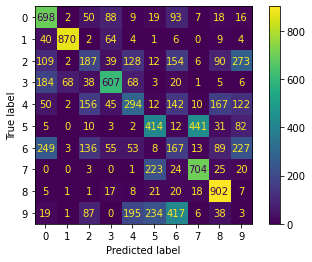

Wall time: 43.8 s


In [274]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(svm,Ptest,test_labels)
plt.show()

In [275]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 95%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_prediction[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[svm_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

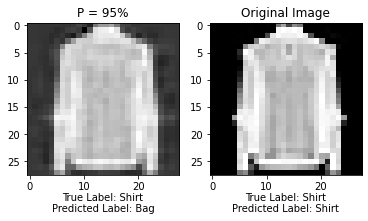

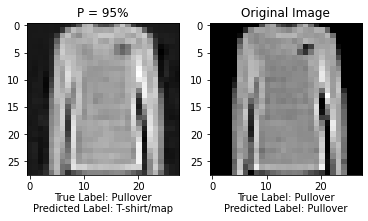

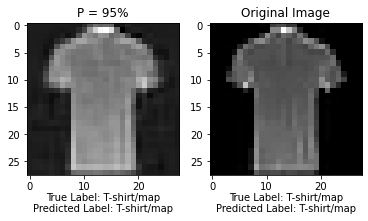

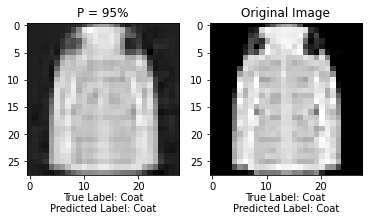

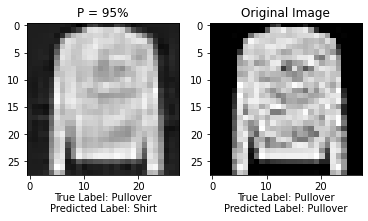

In [276]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Decision Trees </i>

In [277]:
#creating a new instance
decision_tree = DecisionTreeClassifier(criterion="entropy")

In [278]:
#fitting the model
%%time
decision_tree.fit(Ptrain,train_labels)

Wall time: 41.7 s


DecisionTreeClassifier(criterion='entropy')

In [279]:
#predicting new image labels
tree_predict=decision_tree.predict(Ptest)

In [280]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,tree_predict))
decision_tree_score_95 = accuracy_score(test_labels,tree_predict)

Accuracy Score: 0.3952


In [281]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != tree_predict).sum())

Misclassified Samples: 6048


In [282]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,tree_predict)

Wall time: 10 ms


array([[601,  28,  39,  72,  22,  16, 187,   2,  18,  15],
       [ 27, 537,  18, 350,  33,   2,  20,   0,   7,   6],
       [169,   6, 115,  62, 117,  63, 125,  10,  76, 257],
       [ 89, 105,  51, 543,  85,  10,  92,   1,  15,   9],
       [141,   8, 124,  89, 236,  41,  98,  12, 132, 119],
       [ 19,   2,  31,  18,  16, 340,  20, 203,  50, 301],
       [231,  12,  82,  76,  95,  63, 176,   9,  62, 194],
       [  4,   0,  21,   1,   2, 163,  18, 655,  29, 107],
       [ 29,   3,  27,  20,  23,  52,  34,  20, 745,  47],
       [ 23,   3, 331,  10, 212,  82, 200,  66,  69,   4]], dtype=int64)

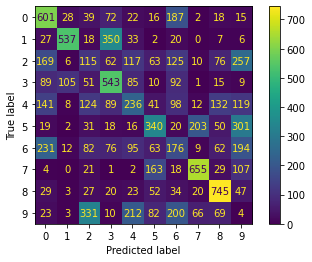

Wall time: 654 ms


In [283]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(decision_tree,Ptest,test_labels)
plt.show()

In [284]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 95%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[tree_predict_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

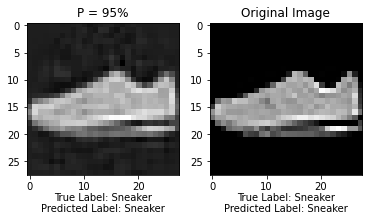

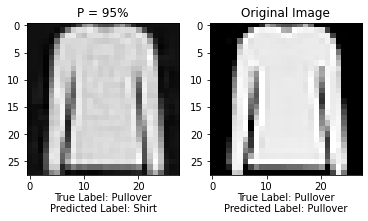

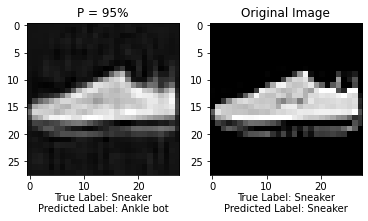

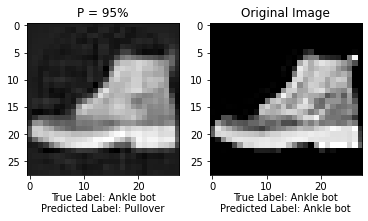

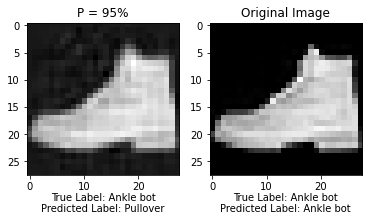

In [285]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

## <i> Random Forests </i>

In [286]:
#creating a new instance
random_forest = RandomForestClassifier(criterion="entropy",n_estimators = 100 , random_state = 0)

In [287]:
#fitting the model
%%time
random_forest.fit(Ptrain,train_labels)

Wall time: 3min 57s


RandomForestClassifier(criterion='entropy', random_state=0)

In [288]:
#predicting new image labels
random_forest_pred = random_forest.predict(Ptest)

In [289]:
#displaying the accuracy score
print("Accuracy Score:",accuracy_score(test_labels,random_forest_pred))
random_forest_score_95 = accuracy_score(test_labels,random_forest_pred)

Accuracy Score: 0.6324


In [290]:
#displaying the misclassifed samples
print("Misclassified Samples:", (test_labels != random_forest_pred).sum())

Misclassified Samples: 3676


In [291]:
#displaying the confusion matrix as an array form
%%time
confusion_matrix(test_labels,random_forest_pred)

Wall time: 11 ms


array([[794,   5,  23,  81,   8,   7,  50,   0,  29,   3],
       [ 24, 898,   0,  56,   8,   0,   2,   0,   4,   8],
       [ 39,   0, 345,  33, 151,   8,  62,   0,  67, 295],
       [ 92,   8,   7, 796,  45,   0,  36,   0,  11,   5],
       [ 13,   0, 100,  61, 512,   7,  54,   0,  53, 200],
       [  0,   0,  25,   7,   6, 718,   5, 197,  21,  21],
       [265,   2,  96,  79, 158,  13, 131,   1,  68, 187],
       [  0,   0,  18,   0,   1, 161,   1, 797,   9,  13],
       [  8,   0,   7,  27,   8,  19,   7,   8, 912,   4],
       [  0,   0, 210,   0,  93, 193,  28,  40,  15, 421]], dtype=int64)

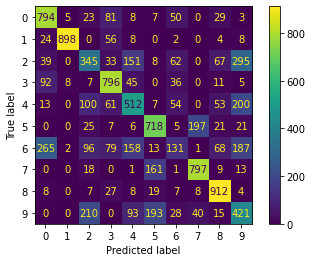

Wall time: 690 ms


In [292]:
#using matplotlib to display confusion matrix
%%time
plot_confusion_matrix(random_forest,Ptest,test_labels)
plt.show()

In [293]:
#creating a function to display reduced variance image and original image
def image_comparator():
    plt.subplot(1,2,1)
    index = random.randrange(0,len(inv_test))
    image_array = np.array(inv_test[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("P = 95%")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.subplot(1,2,2)
    image_array = np.array(test_images[index], dtype='float32')
    image_array = image_array.reshape(img_h,img_w)
    plt.title("Original Image")
    plt.xlabel("True Label: " + label_name[test_labels[index]]+
        "\nPredicted Label: " + label_name[random_forest_pred_org[index]],labelpad=0.4)
    plt.imshow(image_array, cmap='gray')
    plt.show()

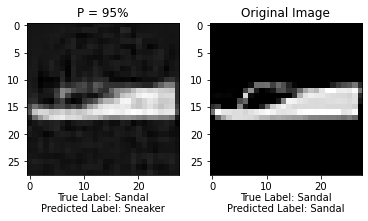

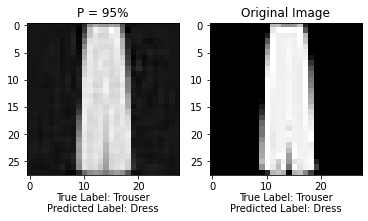

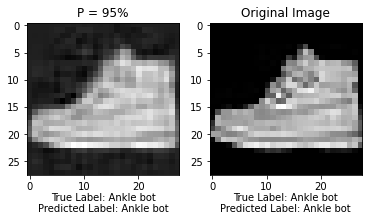

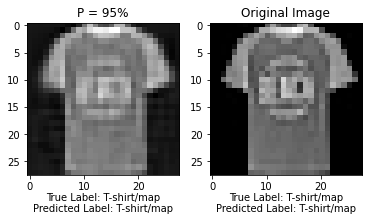

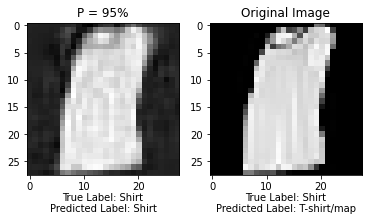

In [294]:
#creating a loop to display multiple images
i = 0
while(i<5):
    image_comparator()
    i+=1

In [295]:
#creating a list that holds actual explained variance ratios
[ratio_25,ratio_50,ratio_75,ratio_95]

[29.0392279213657, 52.81375988269661, 75.32242019511817, 95.00476087214096]

In [296]:
#creating a dictionary to use as data in dataframe
pca_data = {'n_components = 1':[knn_score_25,perceptron_score_25,svm_score_25,decision_tree_score_25,random_forest_score_25
                                ,str(round(ratio_25,2))+"%"],
           'n_components = 3':[knn_score_50,perceptron_score_50,svm_score_50,decision_tree_score_50,random_forest_score_50
                               ,str(round(ratio_50,2))+"%"],
           'n_components = 14':[knn_score_75,perceptron_score_75,svm_score_75,decision_tree_score_75,random_forest_score_75
                                ,str(round(ratio_75,2))+"%"],
           'n_components = 189':[knn_score_95,perceptron_score_95,svm_score_95,decision_tree_score_95,random_forest_score_95
                                 ,str(round(ratio_95,2))+"%"]}

In [297]:
#creating a table that mentions in hw description
pca_df = pd.DataFrame(data=pca_data,index=['K-Neighbors','Perceptron','SVM','Decision Trees','Random Forests','Explained Variance'])
pca_df

,n_components = 1,n_components = 3,n_components = 14,n_components = 189
K-Neighbors,0.251,0.2925,0.5581,0.5596
Perceptron,0.1363,0.2298,0.4743,0.4743
SVM,0.3142,0.3157,0.4153,0.4846
Decision Trees,0.2255,0.2496,0.4679,0.3952
Random Forests,0.2256,0.306,0.5549,0.6324
Explained Variance,29.04%,52.81%,75.32%,95.0%
